# Task
Ejercicio 9

Subir un archivo de audio propio, publicar la frecuencia de muestreo, duración y cantidad de canales, y plotear las tres gráficas con plot_tiempo_frecuencia_espectrograma.


## Instalar librerías

### Subtask:
Instalar las librerías necesarias para el manejo y análisis de audio, y para la visualización.


In [ ]:
%pip install librosa soundfile matplotlib numpy

## Subir archivo de audio

### Subtask:
Proporcionar una forma para que el usuario suba su archivo de audio al entorno de Colab.


In [6]:
from google.colab import files

uploaded = files.upload()

Saving pianoLA4.mp3 to pianoLA4.mp3


## Cargar y analizar audio

### Subtask:
Cargar el archivo de audio y obtener su frecuencia de muestreo, duración y número de canales.


In [7]:
import librosa
import numpy as np

filename = list(uploaded.keys())[0]
y, sr = librosa.load(filename, sr=None)

duration = len(y) / sr

if y.ndim == 1:
    n_channels = 1
else:
    n_channels = y.shape[1]

print(f"Sampling Frequency: {sr} Hz")
print(f"Duration: {duration:.2f} seconds")
print(f"Number of Channels: {n_channels}")

Sampling Frequency: 44100 Hz
Duration: 5.27 seconds
Number of Channels: 1


In [8]:
from IPython.display import Audio
Audio(data=y, rate=sr)

## Definir función de ploteo

### Subtask:
Crear la función `plot_tiempo_frecuencia_espectrograma` para visualizar los datos de audio.


In [9]:
import matplotlib.pyplot as plt
import librosa.display

def plot_tiempo_frecuencia_espectrograma(y, sr):
    """
    Plots the time-domain waveform, frequency spectrum, and spectrogram of an audio signal.

    Args:
        y (np.ndarray): Audio time series.
        sr (int): Sampling rate of y.
    """
    plt.figure(figsize=(15, 10))
    plt.suptitle("Audio Analysis", fontsize=16)

    # Plot Time-Domain Waveform
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.title("Forma de Onda")

    # Plot Frequency Spectrum
    plt.subplot(3, 1, 2)
    fft_result = np.fft.fft(y)
    frequencies = np.fft.fftfreq(len(fft_result), 1/sr)
    plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(fft_result)//2])
    plt.xlabel("Frequencia (Hz)")
    plt.ylabel("Magnitud")
    plt.title("Espectro de Frecuencia")

    # Plot Spectrogram
    plt.subplot(3, 1, 3)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Frequencia (Hz)")
    plt.title("Espectograma")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Mostrar resultados y plotear

### Subtask:
Mostrar la frecuencia de muestreo, duración y número de canales, y luego usar la función de ploteo para generar las gráficas.


Sampling Frequency: 44100 Hz
Duration: 5.27 seconds
Number of Channels: 1


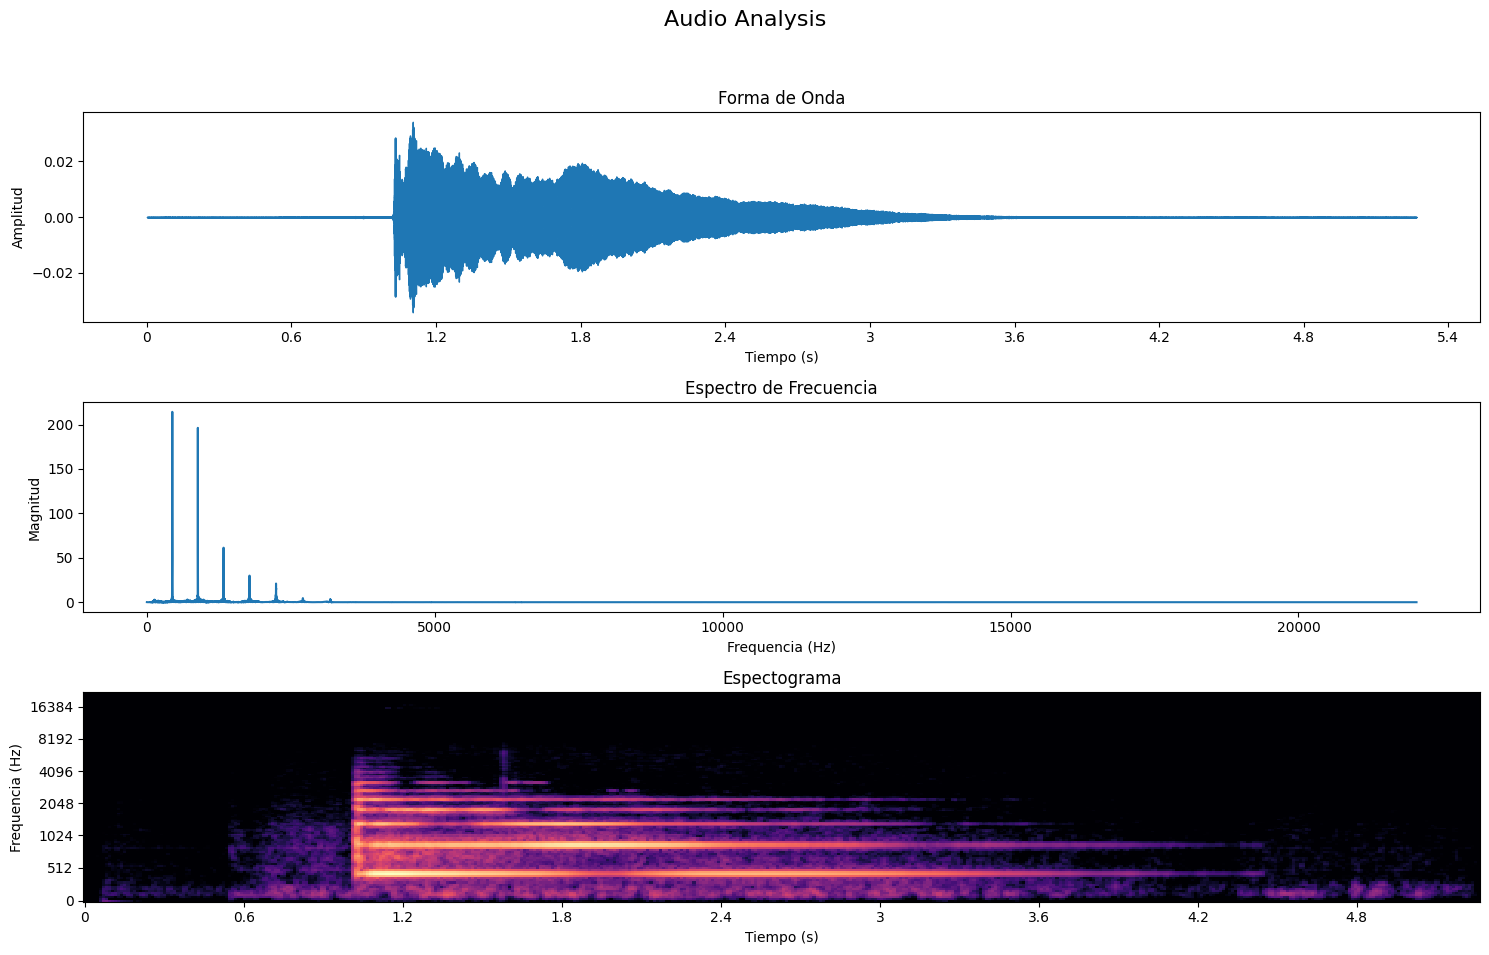

In [10]:
print(f"Sampling Frequency: {sr} Hz")
print(f"Duration: {duration:.2f} seconds")
print(f"Number of Channels: {n_channels}")

plot_tiempo_frecuencia_espectrograma(y, sr)